# Lateration Experiments

## Imports

In [49]:
import math
import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize

random_seed = None
random.seed(random_seed)

In [50]:
class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
    def __str__(self):
        return 'Center: '+str(self.center)+' Radius: '+str(self.radius)

In [51]:
true_location = (10,5)

circles =[
    Circle((5,5), 5+random.uniform(-3, 3)),
    Circle((10,10), 5+random.uniform(-3, 3)),
    Circle((15,5), 5+random.uniform(-3, 3)),
]

num_circles = len(circles)
sum_distances = sum([1/c.radius if c.radius > 0 else float('inf') for c in circles])
num0_distance = sum([1 if c.radius == 0 else 0 for c in circles])

In [52]:
distance_weights = []
for c in circles:
    if sum_distances == 0:
        distance_weights.append(1/num_circles)
    elif c.radius == 0:
        distance_weights.append(1/num0_distance)
    else:
        distance_weights.append((1/c.radius)/sum_distances)

print(distance_weights)
print(sum(distance_weights))

[0.3333333333333333, 0.2222222222222222, 0.4444444444444444]
1.0


In [53]:
guess = (0,0)
for i, c in enumerate(circles):
    guess = (guess[0]+c.center[0]*distance_weights[i], guess[1]+c.center[1]*distance_weights[i])
    
print(guess)

(10.555555555555555, 6.111111111111111)


In [54]:
def distance(a, b):
    return math.hypot(a[0]-b[0], a[1]-b[1])

def error(p, circles):
    error = 0
    for c in circles:
        d = distance(p, c.center)
        error += (c.radius - d)**2
    return error/len(circles)

In [55]:
result = minimize(error, guess, args=(circles), options={
    'return_all': True
})
location = tuple(result.x)
print(location)

(10.218448879174897, 5.866394791023018)


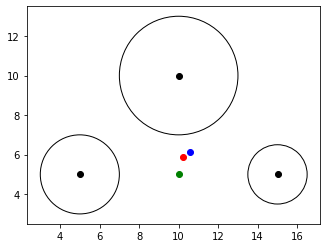

In [56]:
fig, ax = plt.subplots()

for c in circles:
    draw_circle = plt.Circle(c.center, c.radius, fill=False)
    ax.scatter(c.center[0], c.center[1], c='black')
    ax.add_patch(draw_circle)
    ax.set_aspect(1)

ax.scatter(guess[0], guess[1], c='blue')
ax.scatter(location[0], location[1], c='red')
ax.scatter(true_location[0], true_location[1], c='green')

plt.show()

In [9]:
for c in circles:
    print(c)

distance(true_location, location)

Center: (5, 5) Radius: 4.3849332618887455
Center: (10, 10) Radius: 3.1370694190028927
Center: (15, 5) Radius: 7.414635919853188


3.2964784769710893